In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
avocado = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv.zip')


In [4]:
avocado.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado['is_organic'] = avocado['type'].map({'conventional': 0, 'organic': 1})


<Axes: xlabel='is_organic', ylabel='count'>

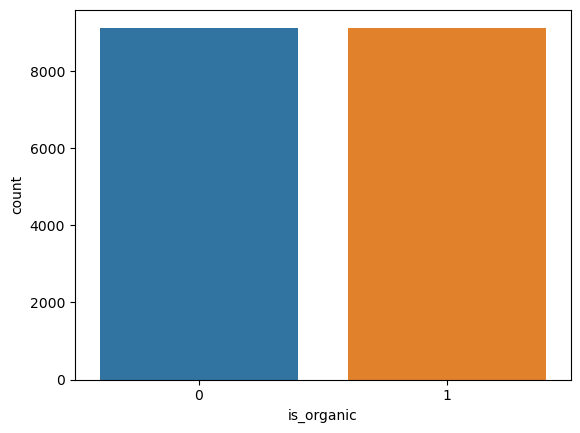

In [6]:
sns.countplot(x='is_organic', data=avocado)


In [7]:
avocado_regressor = avocado[['AveragePrice', 'Total Volume', '4046', '4225', '4770']]


<Axes: >

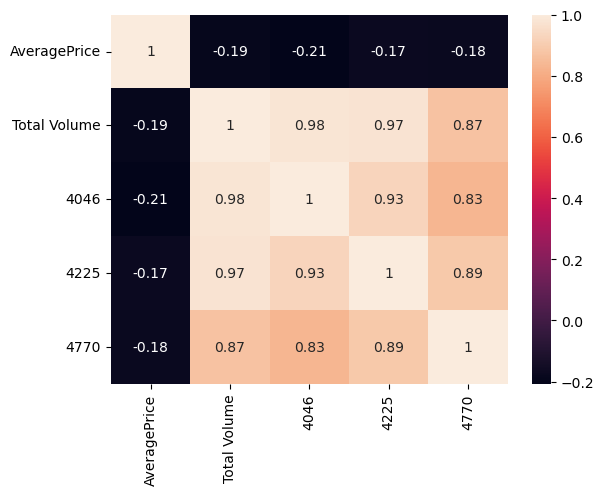

In [8]:
sns.heatmap(avocado_regressor.corr(), annot=True)


<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

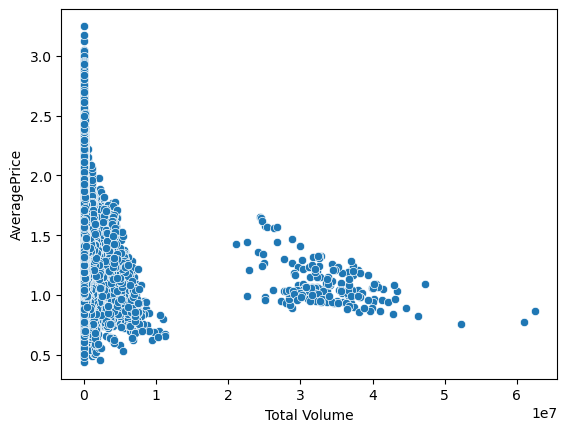

In [9]:
sns.scatterplot(x='Total Volume', y='AveragePrice', data=avocado_regressor)


In [10]:
from sklearn.model_selection import train_test_split

X = avocado_regressor.drop('AveragePrice', axis=1)
y = avocado_regressor['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.154624551822468
